# Amazon (AMZN) Stock Price prediction (November 2022) using Facebook Prophet 

## Importing all the necessary Libraries

In [ ]:
#libraries = Pandas, fbprophet and plotly

#pandas for data Manipulation and analysis
#Facebook prophet for Forecasting
#plotly for data visualization


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-1.0.8-py3-none-any.whl (81 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
import pandas as pd
import plotly.express as px
import prophet 

In [ ]:
from prophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Data Exploration


In [ ]:
df = pd.read_csv("AMZN.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-27,169.399994,171.850006,168.572495,169.624496,169.624496,54044000
1,2021-10-28,170.104996,173.949997,169.300003,172.328506,172.328506,114174000
2,2021-10-29,165.001007,168.740997,163.666000,168.621506,168.621506,129722000
3,2021-11-01,168.089996,168.792999,164.600998,165.905502,165.905502,72178000
4,2021-11-02,165.750504,166.556000,164.177505,165.637497,165.637497,52552000
...,...,...,...,...,...,...,...
247,2022-10-20,113.830002,118.239998,113.510002,115.250000,115.250000,48795100
248,2022-10-21,114.790001,119.589996,114.500000,119.320000,119.320000,55611900
249,2022-10-24,119.980003,120.389999,116.570000,119.820000,119.820000,49531500
250,2022-10-25,119.650002,121.320000,118.949997,120.599998,120.599998,50934600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,140.903633,143.184053,138.516084,140.783540,140.783540,7.206509e+07
std,23.510126,23.371458,23.473610,23.356712,23.356712,3.125480e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,3.575400e+07
25%,117.827500,120.189998,115.524378,118.160000,118.160000,5.337318e+07
50%,141.893753,144.113998,139.139755,140.720001,140.720001,6.378700e+07
75%,163.017754,164.910877,160.798882,162.664875,162.664875,8.058900e+07
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08


# Data Visualization with plotly express- Visualizing the historical performance of Amazon


In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, x="Date", y="Volume")

In [ ]:
px.box(df, y="Close")

# Why Facebook Prophet Model?


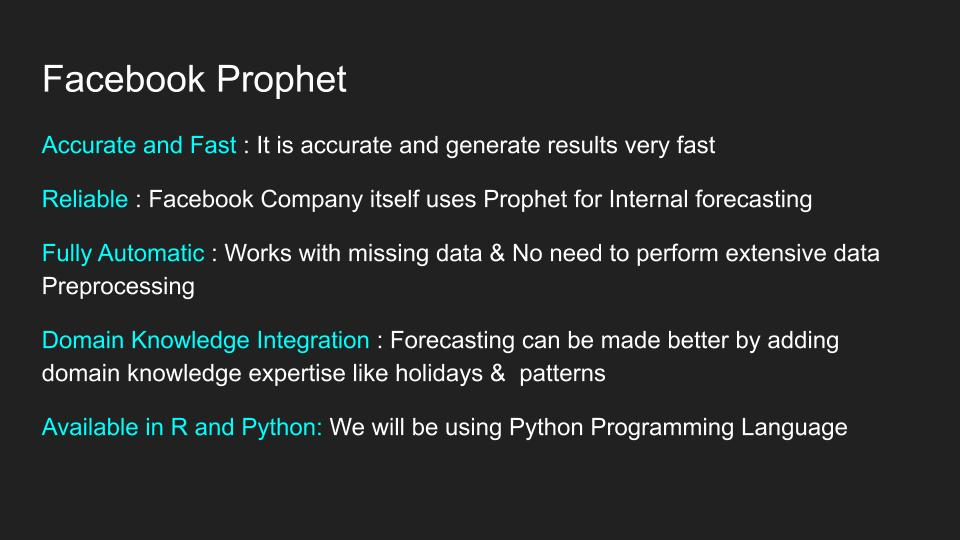

## Data Preprocessing for Data Modeling

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-27,169.399994,171.850006,168.572495,169.624496,169.624496,54044000
1,2021-10-28,170.104996,173.949997,169.300003,172.328506,172.328506,114174000
2,2021-10-29,165.001007,168.740997,163.666000,168.621506,168.621506,129722000
3,2021-11-01,168.089996,168.792999,164.600998,165.905502,165.905502,72178000
4,2021-11-02,165.750504,166.556000,164.177505,165.637497,165.637497,52552000
...,...,...,...,...,...,...,...
247,2022-10-20,113.830002,118.239998,113.510002,115.250000,115.250000,48795100
248,2022-10-21,114.790001,119.589996,114.500000,119.320000,119.320000,55611900
249,2022-10-24,119.980003,120.389999,116.570000,119.820000,119.820000,49531500
250,2022-10-25,119.650002,121.320000,118.949997,120.599998,120.599998,50934600


In [ ]:
  columns=['Date', 'Close']
  newdf= pd.DataFrame(df, columns=columns)

In [ ]:
newdf

,Date,Close
0,2021-10-27,169.624496
1,2021-10-28,172.328506
2,2021-10-29,168.621506
3,2021-11-01,165.905502
4,2021-11-02,165.637497
...,...,...
247,2022-10-20,115.250000
248,2022-10-21,119.320000
249,2022-10-24,119.820000
250,2022-10-25,120.599998


In [ ]:
prophet_df = newdf.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2021-10-27,169.624496
1,2021-10-28,172.328506
2,2021-10-29,168.621506
3,2021-11-01,165.905502
4,2021-11-02,165.637497
...,...,...
247,2022-10-20,115.250000
248,2022-10-21,119.320000
249,2022-10-24,119.820000
250,2022-10-25,120.599998


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc0fgyav/dcigorvk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc0fgyav/xryigyc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82422', 'data', 'file=/tmp/tmpzc0fgyav/dcigorvk.json', 'init=/tmp/tmpzc0fgyav/xryigyc4.json', 'output', 'file=/tmp/tmpzc0fgyav/prophet_modelycl3_8wa/prophet_model-20221027012349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:23:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:23:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting Data


In [ ]:
future= m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-27,178.011854,165.505496,192.929758,178.011854,178.011854,1.814579,1.814579,1.814579,1.814579,1.814579,1.814579,0.0,0.0,0.0,179.826433
1,2021-10-28,177.785247,164.927429,192.570947,177.785247,177.785247,1.670904,1.670904,1.670904,1.670904,1.670904,1.670904,0.0,0.0,0.0,179.456150
2,2021-10-29,177.558639,165.838119,193.266346,177.558639,177.558639,1.085754,1.085754,1.085754,1.085754,1.085754,1.085754,0.0,0.0,0.0,178.644393
3,2021-11-01,176.878818,165.872559,193.452388,176.878818,176.878818,2.260251,2.260251,2.260251,2.260251,2.260251,2.260251,0.0,0.0,0.0,179.139070
4,2021-11-02,176.652211,164.520299,191.811523,176.652211,176.652211,1.765818,1.765818,1.765818,1.765818,1.765818,1.765818,0.0,0.0,0.0,178.418030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-11-21,120.288104,108.006152,136.417218,119.491810,121.062520,2.260251,2.260251,2.260251,2.260251,2.260251,2.260251,0.0,0.0,0.0,122.548355
278,2022-11-22,120.282687,107.565237,136.112468,119.433535,121.098163,1.765818,1.765818,1.765818,1.765818,1.765818,1.765818,0.0,0.0,0.0,122.048505
279,2022-11-23,120.277270,108.050623,135.904441,119.399518,121.107340,1.814579,1.814579,1.814579,1.814579,1.814579,1.814579,0.0,0.0,0.0,122.091849
280,2022-11-24,120.271854,107.865501,135.806865,119.323853,121.158682,1.670904,1.670904,1.670904,1.670904,1.670904,1.670904,0.0,0.0,0.0,121.942757


In [ ]:
px.line(forecast, x='ds' , y='yhat')

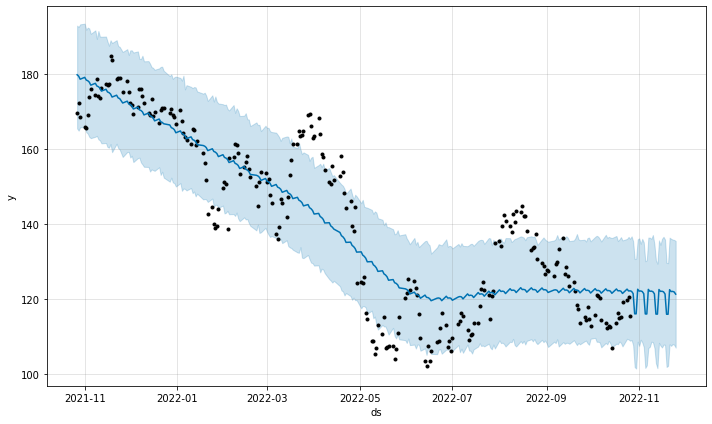

In [ ]:
figure= m.plot(forecast, xlabel='ds', ylabel='y')

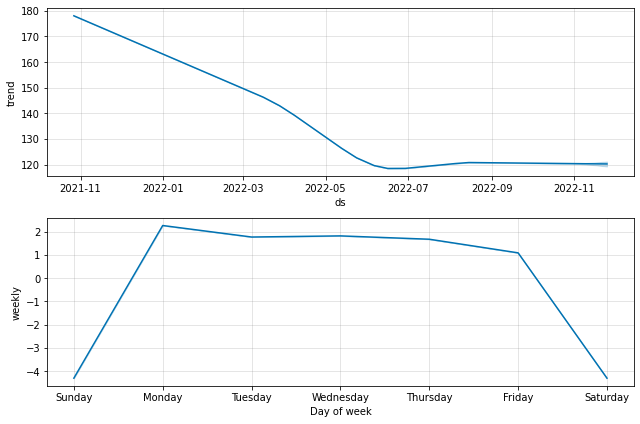

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>